## Check the setup and connect to the database

In [1]:
%run 'exercise1-check_setup.ipynb'

SAP HANA Client for Python: 2.21.24062400
The file './00-setup/user.ini' exists.
Connection to SAP HANA db at a0f81553-537d-4e3a-808d-fe370ba4095a.hana.prod-eu20.hanacloud.ondemand.com:443 
will be attempted for the user INNOV8ION_USER2
Connected to SAP HANA db version 4.00.000.00.1732009081 (fa/CE2024.28) 
at a0f81553-537d-4e3a-808d-fe370ba4095a.hana.prod-eu20.hanacloud.ondemand.com:443 as user INNOV8ION_USER2
Current time on the SAP HANA server: 2024-12-12 14:52:22.119000


# Tables from SAP HANA

In [2]:
hdf_train=myconn.table('TITANIC', schema='DB_1')

## The first look at the table

In [3]:
hdf_train.get_table_structure()

{'PASSENGERID': 'INT',
 'SURVIVED': 'INT',
 'PCLASS': 'INT',
 'NAME': 'NVARCHAR(200)',
 'SEX': 'NVARCHAR(1)',
 'AGE': 'INT',
 'SIBSP': 'INT',
 'PARCH': 'INT',
 'TICKET': 'NVARCHAR(200)',
 'FARE': 'INT',
 'CABIN': 'NVARCHAR(200)',
 'EMBARKED': 'NVARCHAR(1)'}

Let's check various statistics of the dataset using [a `describe()` method](https://help.sap.com/doc/cd94b08fe2e041c2ba778374572ddba9/2023_3_QRC/en-US/hana_ml.dataframe.html#hana_ml.dataframe.DataFrame.describe)

In [4]:
hdf_train.describe().collect()

,column,count,unique,nulls,mean,std,min,max,median,25_percent_cont,25_percent_disc,50_percent_cont,50_percent_disc,75_percent_cont,75_percent_disc
0,PASSENGERID,891,891,0,446.000000,257.353842,1.0,891.0,446.0,223.5,223.0,446.0,446.0,668.5,669.0
1,SURVIVED,891,2,0,0.383838,0.486592,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,PCLASS,891,3,0,2.308642,0.836071,1.0,3.0,3.0,2.0,2.0,3.0,3.0,3.0,3.0
3,AGE,714,71,177,29.679272,14.536482,0.0,80.0,28.0,20.0,20.0,28.0,28.0,38.0,38.0
4,SIBSP,891,7,0,0.523008,1.102743,0.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
5,PARCH,891,7,0,0.381594,0.806057,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,FARE,891,91,0,31.785634,49.703729,0.0,512.0,14.0,7.0,7.0,14.0,14.0,31.0,31.0
7,NAME,891,891,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,SEX,891,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,TICKET,891,681,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


🤓 **Let's discuss**:
- What can we read from the dataset above

# Unified Report

Unified Reports: https://help.sap.com/doc/cd94b08fe2e041c2ba778374572ddba9/2023_3_QRC/en-US/hana_ml.visualizers.html#module-hana_ml.visualizers.unified_report

In [5]:
from hana_ml.visualizers.unified_report import UnifiedReport

In [7]:
UnifiedReport(obj=hdf_train).build(key='PASSENGERID').display()

Generating dataset report...:  38%|█████████████▏                     | 3/8 [00:09<00:14,  2.97s/it]

ERROR:hana_ml.algorithms.pal.stats:(2048, 'column store error: "INNOV8ION_USER2"."(DO statement)": line 29 col 1 (at pos 1147): search table error:  [2620] _SYS_AFL.AFLPAL:MULTIPLE_CORRELATION_ANY: [135] (range 2) AFLFunctionFatal exception: Function not supported by pal-service.; $condition$=!(isPalServiceEnabled())')
Traceback (most recent call last):
  File "/home/user/projects/hana-ml-py-codejam/env/lib/python3.11/site-packages/hana_ml/algorithms/pal/stats.py", line 1329, in _correlation_matrix
    call_pal_auto_with_hint(conn,
  File "/home/user/projects/hana-ml-py-codejam/env/lib/python3.11/site-packages/hana_ml/algorithms/pal/pal_base.py", line 1400, in call_pal_auto_with_hint
    if try_exec(cur, sql, conn):
       ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/user/projects/hana-ml-py-codejam/env/lib/python3.11/site-packages/hana_ml/algorithms/pal/pal_base.py", line 1355, in try_exec
    cur.execute(sql)
hdbcli.dbapi.Error: (2048, 'column store error: "INNOV8ION_USER2"."(DO statement)

Generating dataset report...:  50%|█████████████████▌                 | 4/8 [00:10<00:09,  2.26s/it]

ERROR:hana_ml.algorithms.pal.stats:(2048, 'column store error: "INNOV8ION_USER2"."(DO statement)": line 29 col 1 (at pos 1147): search table error:  [2620] _SYS_AFL.AFLPAL:MULTIPLE_CORRELATION_ANY: [135] (range 2) AFLFunctionFatal exception: Function not supported by pal-service.; $condition$=!(isPalServiceEnabled())')
Traceback (most recent call last):
  File "/home/user/projects/hana-ml-py-codejam/env/lib/python3.11/site-packages/hana_ml/algorithms/pal/stats.py", line 1329, in _correlation_matrix
    call_pal_auto_with_hint(conn,
  File "/home/user/projects/hana-ml-py-codejam/env/lib/python3.11/site-packages/hana_ml/algorithms/pal/pal_base.py", line 1400, in call_pal_auto_with_hint
    if try_exec(cur, sql, conn):
       ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/user/projects/hana-ml-py-codejam/env/lib/python3.11/site-packages/hana_ml/algorithms/pal/pal_base.py", line 1355, in try_exec
    cur.execute(sql)
hdbcli.dbapi.Error: (2048, 'column store error: "INNOV8ION_USER2"."(DO statement)

Generating dataset report...:  62%|█████████████████████▉             | 5/8 [00:11<00:05,  1.74s/it]

Generating dataset report...: 100%|███████████████████████████████████| 8/8 [00:12<00:00,  1.53s/it]
In order to review the dataset report better, you need to adjust the size of the left area or hide the left area temporarily!


🤓 **Let's discuss**:
1. What can be found in the dataset's report above

## <u>**All exercises below are optional! You might want to proceed to exercise 4.**</u>

# [**Optional**] EDA, or Exploratory Data Analysis

## **Optional:** Categorical variable evaluation: Passenger Class

In [8]:
from hana_ml.visualizers.eda import *

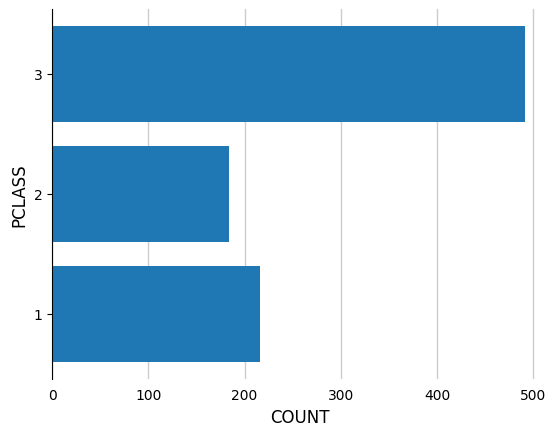

In [10]:
ax, bar_data = EDAVisualizer(enable_plotly=False).bar_plot(data=hdf_train, column='PCLASS', aggregation={'PCLASS':'count'})

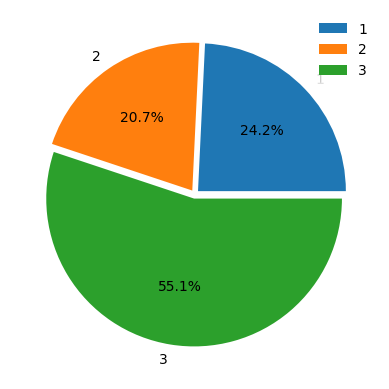

In [12]:
ax, pie_data = EDAVisualizer(enable_plotly=False).pie_plot(data=hdf_train, column='PCLASS')

## **Optional:** Continuous variables evaluation: Age

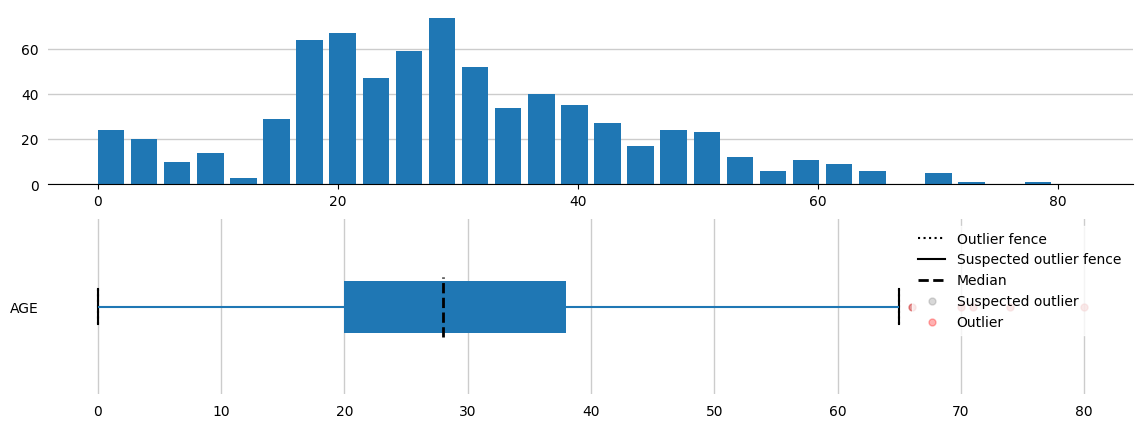

In [14]:
fig = plt.figure(figsize=(14,5))
#print (fig.figbbox)
ax1 = fig.add_subplot(211)
eda1 = EDAVisualizer(ax=ax1, enable_plotly=False)
ax1, dist_data = eda1.distribution_plot(data=hdf_train.dropna(subset=['AGE']), column="AGE", bins=30)

ax2 = fig.add_subplot(212)
eda2 = EDAVisualizer(ax=ax2, enable_plotly=False)
ax2, corr_data = eda2.box_plot(data=hdf_train.dropna(subset=['AGE']), column='AGE', outliers=True)
#plt.show()